
# EDA · Saber Pro 2024 — Universidad Mariana · Ingeniería de Sistemas (SNIES 2445)

Este cuaderno realiza un **Análisis Exploratorio de Datos (EDA)** profesional sobre los microdatos de **Saber Pro 2024**, con enfoque exclusivo en los estudiantes de **Universidad Mariana** matriculados en **Ingeniería de Sistemas** (código **SNIES 2445**).

**Objetivo dentro del TFM:** generar la **línea de salida** (desempeño al egreso) que luego se cruzará con la **línea de entrada** (Saber 11) para estimar **Valor Agregado (VA)** y **Contribución Relativa (CR)** del programa.


In [1]:

import os
import unicodedata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tkinter import Tk, filedialog

plt.rcParams.update({
    "figure.figsize": (9, 5),
    "axes.grid": True
})

print("Librerías cargadas correctamente")

Librerías cargadas correctamente



## 1) Selección del archivo de datos

En lugar de fijar un nombre, se abrirá un cuadro de diálogo para seleccionar el archivo TXT de Saber Pro 2020.  
Así evitamos errores de "archivo no encontrado".


In [2]:


file_path = "Examen_Saber_Pro_Genericas_2024.txt"

if not os.path.exists(file_path):
    raise FileNotFoundError(f"No se encontró el archivo en la ruta: {file_path}")

print("Archivo seleccionado:", file_path)

# Columnas de interés
COLS = [
    "estu_inst_departamento","inst_nombre_institucion","inst_cod_institucion","inst_origen","inst_caracter_academico",
    "estu_prgm_academico","estu_snies_prgmacademico","estu_nivel_prgm_academico",
    "estu_depto_presentacion","estu_mcpio_presentacion","estu_zona_presentacion",
    "estu_genero","fami_estratovivienda",
    "estu_horassemanatrabaja","estu_pagomatriculabeca","estu_pagomatriculacredito",
    "estu_pagomatriculapadres","estu_pagomatriculapropio",
    "mod_lectura_critica_punt","mod_razona_cuantitat_punt","mod_comuni_escrita_punt",
    "mod_ingles_punt","mod_competen_ciudada_punt","punt_global","percentil_global",
]

# Lectura del archivo
df = pd.read_csv(file_path, sep=";", encoding="latin1", low_memory=False)
keep = [c for c in COLS if c in df.columns]
df = df[keep].copy()

print("Dimensiones iniciales:", df.shape)
df.head(3)


Archivo seleccionado: Examen_Saber_Pro_Genericas_2024.txt
Dimensiones iniciales: (281601, 24)


,estu_inst_departamento,inst_nombre_institucion,inst_cod_institucion,inst_origen,inst_caracter_academico,estu_prgm_academico,estu_snies_prgmacademico,estu_nivel_prgm_academico,estu_depto_presentacion,estu_mcpio_presentacion,...,estu_pagomatriculacredito,estu_pagomatriculapadres,estu_pagomatriculapropio,mod_lectura_critica_punt,mod_razona_cuantitat_punt,mod_comuni_escrita_punt,mod_ingles_punt,mod_competen_ciudada_punt,punt_global,percentil_global
0,ATLANTICO,UNIVERSIDAD SIMON BOLIVAR-BARRANQUILLA,2805.0,NO OFICIAL - CORPORACIÃN,UNIVERSIDAD,INGENIERIA INDUSTRIAL,7511.0,UNIVERSITARIO,SUCRE,SINCELEJO,...,NaN,NaN,NaN,164,118,182,125.0,130,144,47.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BOGOTÃ,BOGOTÃ D.C.,...,No,No,No,204,169,149,300.0,197,204,99.0
2,VALLE,UNIVERSIDAD SANTIAGO DE CALI-PALMIRA,1829.0,NO OFICIAL - CORPORACIÃN,UNIVERSIDAD,DERECHO,106978.0,UNIVERSITARIO,VALLE,PALMIRA,...,NaN,NaN,NaN,196,162,202,207.0,187,191,96.0



## 2) Limpieza y normalización

- Conversión de puntajes a numéricos.  
- Normalización de textos (mayúsculas, sin tildes).  
- Eliminación de duplicados.


In [3]:

# 2.1 Conversión de puntajes
score_cols = ["mod_lectura_critica_punt","mod_razona_cuantitat_punt","mod_comuni_escrita_punt",
              "mod_ingles_punt","mod_competen_ciudada_punt","punt_global","percentil_global"]
for c in score_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# 2.2 Normalización de texto
def norm_text(s: pd.Series) -> pd.Series:
    s = s.astype(str).str.replace("\xa0"," ", regex=False).str.strip()
    s = s.apply(lambda x: "".join(ch for ch in unicodedata.normalize("NFKD", x) if not unicodedata.combining(ch)))
    return s.str.upper()

for c in ["inst_nombre_institucion","estu_prgm_academico","inst_origen",
          "inst_caracter_academico","estu_genero","fami_estratovivienda","estu_inst_departamento",]:
    if c in df.columns:
        df[c] = norm_text(df[c])

# 2.3 Duplicados
before = len(df)
df = df.drop_duplicates()
print("Duplicados eliminados:", before - len(df))
df.info()

Duplicados eliminados: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281601 entries, 0 to 281600
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   estu_inst_departamento     281601 non-null  object 
 1   inst_nombre_institucion    281601 non-null  object 
 2   inst_cod_institucion       272448 non-null  float64
 3   inst_origen                281601 non-null  object 
 4   inst_caracter_academico    281601 non-null  object 
 5   estu_prgm_academico        281601 non-null  object 
 6   estu_snies_prgmacademico   272448 non-null  float64
 7   estu_nivel_prgm_academico  272448 non-null  object 
 8   estu_depto_presentacion    281601 non-null  object 
 9   estu_mcpio_presentacion    281601 non-null  object 
 10  estu_genero                281601 non-null  object 
 11  fami_estratovivienda       281601 non-null  object 
 12  estu_horassemanatrabaja    275287 non-null  object 
 13  estu


## 3) Filtro del universo de análisis

Se seleccionan únicamente estudiantes de **Universidad Mariana** y del programa **Ingeniería de Sistemas (SNIES 2445)**.


In [4]:

# Filtro por SNIES si está disponible
mask_snies = False
if "estu_snies_prgmacademico" in df.columns:
    mask_snies = df["estu_snies_prgmacademico"].astype(str).str.strip() == "2445"

# Filtro por nombre (respaldo)
inst_ok = df.get("inst_nombre_institucion", pd.Series(dtype=str)).str.contains("UNIVERSIDAD MARIANA", na=False)
prog_ok = df.get("estu_prgm_academico", pd.Series(dtype=str)).str.contains("INGENIER", na=False) &           df.get("estu_prgm_academico", pd.Series(dtype=str)).str.contains("SISTEM", na=False)

if isinstance(mask_snies, pd.Series) and mask_snies.any():
    df_mariana = df[mask_snies].copy()
else:
    df_mariana = df[inst_ok & prog_ok].copy()

print("Filas tras filtro (Mariana · Ing. Sistemas):", df_mariana.shape)
df_mariana.head(3)

Filas tras filtro (Mariana · Ing. Sistemas): (39, 24)


,estu_inst_departamento,inst_nombre_institucion,inst_cod_institucion,inst_origen,inst_caracter_academico,estu_prgm_academico,estu_snies_prgmacademico,estu_nivel_prgm_academico,estu_depto_presentacion,estu_mcpio_presentacion,...,estu_pagomatriculacredito,estu_pagomatriculapadres,estu_pagomatriculapropio,mod_lectura_critica_punt,mod_razona_cuantitat_punt,mod_comuni_escrita_punt,mod_ingles_punt,mod_competen_ciudada_punt,punt_global,percentil_global
169220,NARIAO,UNIVERSIDAD MARIANA-PASTO,1720.0,NO OFICIAL - FUNDACIAN,UNIVERSIDAD,INGENIERIA DE SISTEMAS,2445.0,UNIVERSITARIO,NARIÃO,PASTO,...,No,Si,No,195,200,191,205.0,174,193,97.0
172300,NARIAO,UNIVERSIDAD MARIANA-PASTO,1720.0,NO OFICIAL - FUNDACIAN,UNIVERSIDAD,INGENIERIA DE SISTEMAS,2445.0,UNIVERSITARIO,NARIÃO,PASTO,...,No,Si,Si,144,170,138,126.0,162,148,54.0
172479,NARIAO,UNIVERSIDAD MARIANA-PASTO,1720.0,NO OFICIAL - FUNDACIAN,UNIVERSIDAD,INGENIERIA DE SISTEMAS,2445.0,UNIVERSITARIO,NARIÃO,PASTO,...,No,Si,Si,0,172,165,165.0,192,139,40.0



## 4) Chequeos de calidad de puntajes


In [5]:

# Nulos
nulls = df_mariana[score_cols].isna().mean().sort_values(ascending=False).to_frame("pct_null")
display((nulls*100).round(2))

# Rango de puntajes
rng = pd.DataFrame({"min": df_mariana[score_cols].min(), "max": df_mariana[score_cols].max()})
display(rng)

,pct_null
mod_lectura_critica_punt,0.0
mod_razona_cuantitat_punt,0.0
mod_comuni_escrita_punt,0.0
mod_ingles_punt,0.0
mod_competen_ciudada_punt,0.0
punt_global,0.0
percentil_global,0.0


,min,max
mod_lectura_critica_punt,0.0,195.0
mod_razona_cuantitat_punt,101.0,200.0
mod_comuni_escrita_punt,0.0,300.0
mod_ingles_punt,110.0,205.0
mod_competen_ciudada_punt,79.0,195.0
punt_global,108.0,193.0
percentil_global,7.0,97.0



## 5) Estadísticos descriptivos


In [6]:

desc = df_mariana[score_cols].describe().T
display(desc)

,count,mean,std,min,25%,50%,75%,max
mod_lectura_critica_punt,39.0,140.102564,31.978442,0.0,131.5,147.0,155.5,195.0
mod_razona_cuantitat_punt,39.0,147.358974,18.243221,101.0,135.0,147.0,159.0,200.0
mod_comuni_escrita_punt,39.0,147.948718,64.224503,0.0,125.5,154.0,172.5,300.0
mod_ingles_punt,39.0,152.025641,19.413082,110.0,139.0,152.0,163.0,205.0
mod_competen_ciudada_punt,39.0,135.410256,27.961174,79.0,116.0,134.0,151.5,195.0
punt_global,39.0,144.589744,19.100452,108.0,137.0,142.0,154.5,193.0
percentil_global,39.0,48.205128,23.428704,7.0,37.0,44.0,63.5,97.0



## 6) Perfil sociodemográfico y formas de financiación


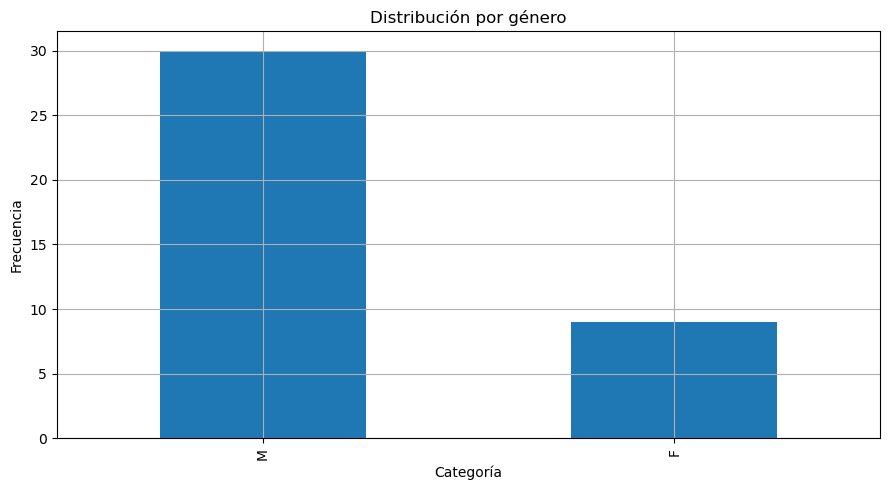

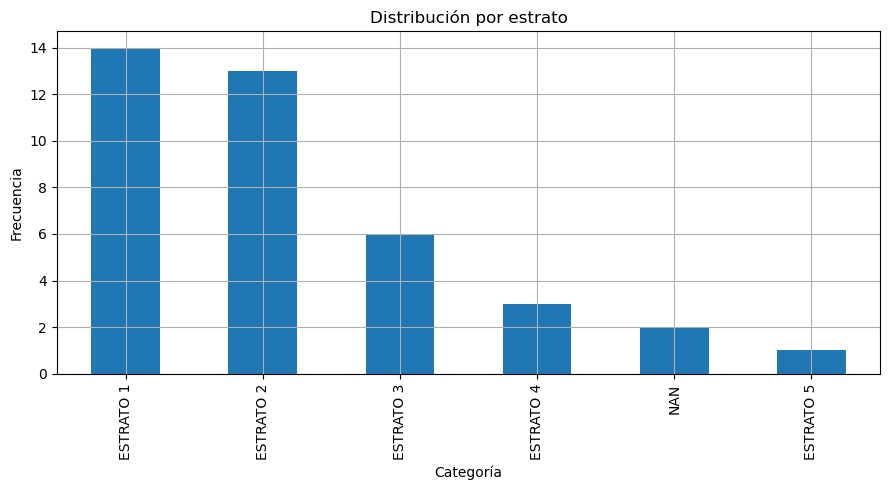

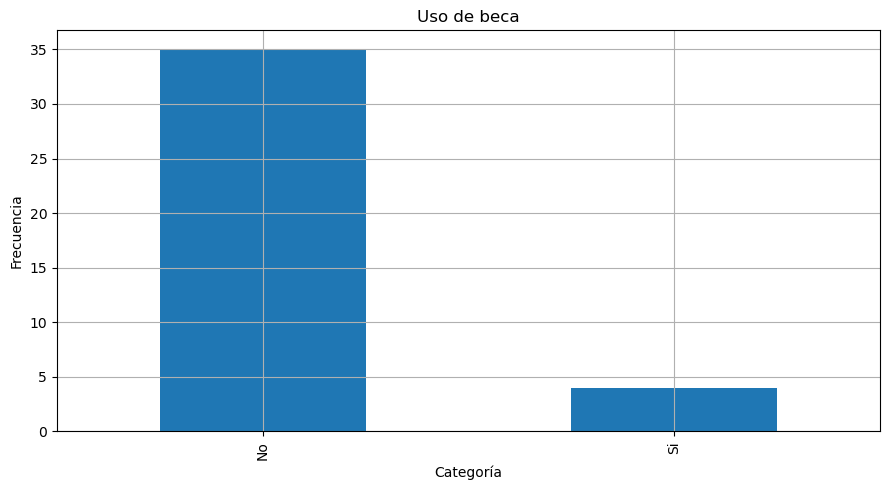

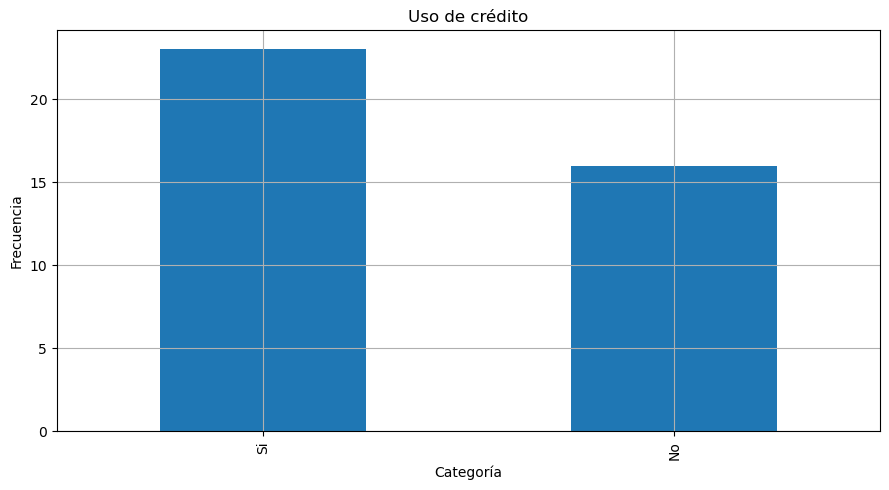

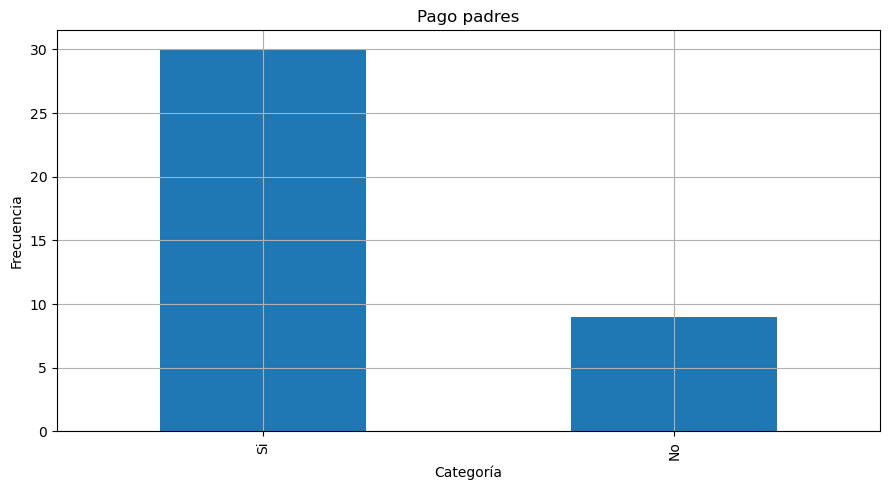

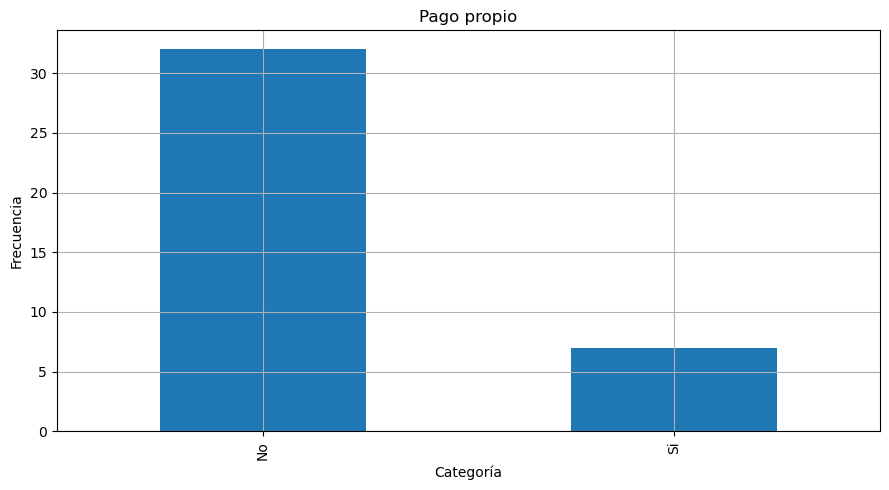

In [7]:

def plot_bar_counts(series, title):
    vc = series.value_counts(dropna=False)
    plt.figure()
    vc.plot(kind="bar")
    plt.title(title)
    plt.xlabel("Categoría")
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

if "estu_genero" in df_mariana.columns:
    plot_bar_counts(df_mariana["estu_genero"], "Distribución por género")

if "fami_estratovivienda" in df_mariana.columns:
    plot_bar_counts(df_mariana["fami_estratovivienda"], "Distribución por estrato")

for paycol, title in [("estu_pagomatriculabeca","Uso de beca"),
                      ("estu_pagomatriculacredito","Uso de crédito"),
                      ("estu_pagomatriculapadres","Pago padres"),
                      ("estu_pagomatriculapropio","Pago propio")]:
    if paycol in df_mariana.columns:
        plot_bar_counts(df_mariana[paycol], f"{title}")

### Resultados — Año 2024

En la distribución por género, se observa nuevamente una **predominancia masculina**, con una clara diferencia frente a la población femenina. Aunque la participación de mujeres muestra una ligera presencia, la brecha de género sigue siendo amplia en esta cohorte.

En cuanto a la distribución por estrato, los resultados muestran que los **estratos 1 y 2 son los más frecuentes**, con valores muy similares entre ambos. El estrato 3 mantiene una presencia intermedia, mientras que el estrato 4 y el estrato 5 aparecen en menor medida. Además, se identifican algunos casos no clasificados (NaN). Esto confirma que la mayor parte de los estudiantes proviene de sectores socioeconómicos bajos y medios-bajos, aunque en este año se evidencia una **mayor diversidad en la representación de estratos**, incluyendo la participación de estudiantes del estrato 5.

Respecto al uso de becas, los resultados muestran que este sigue siendo **muy limitado**: la gran mayoría de estudiantes no cuenta con este beneficio, y solo una fracción reducida accede a este tipo de apoyo económico. 

En lo referente al uso de crédito educativo, se presenta un cambio relevante frente a años anteriores: el número de estudiantes que **sí accede al crédito supera al de quienes no lo usan**. Esto evidencia que el crédito empieza a consolidarse como una alternativa más importante de financiamiento.

En cuanto a las formas de pago, los **padres siguen siendo la principal fuente de financiamiento**, con la mayoría de estudiantes reportando dependencia de este recurso. Sin embargo, se observa un leve aumento en la proporción de quienes declaran **no contar con apoyo parental**, lo que se relaciona con un mayor uso de crédito o de recursos propios. El **pago propio**, aunque minoritario, se mantiene presente en una parte de la población estudiantil.

En síntesis, los resultados del año 2024 confirman la persistencia de un perfil mayoritario masculino y de origen en estratos socioeconómicos bajos, pero también evidencian **una diversificación en las fuentes de financiamiento**. Destaca especialmente el aumento en el uso del crédito educativo, lo que sugiere una transformación en las estrategias de sostenimiento económico de los estudiantes.




## 7) Distribución de puntajes


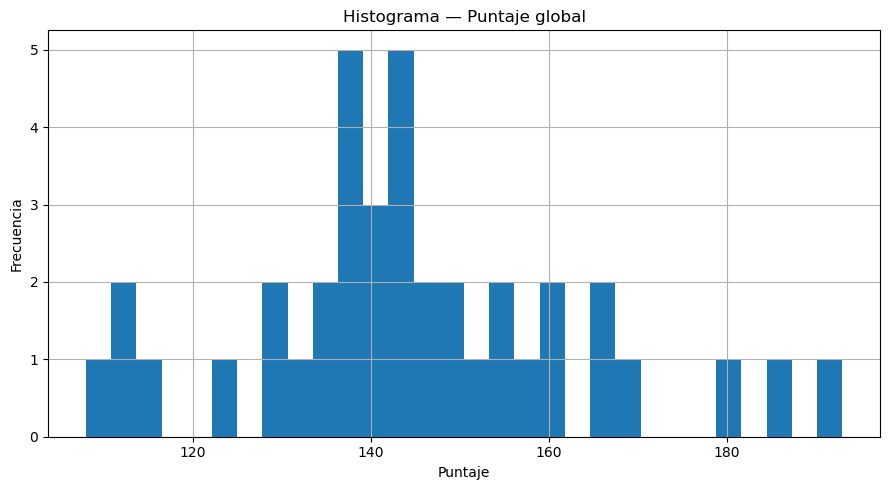

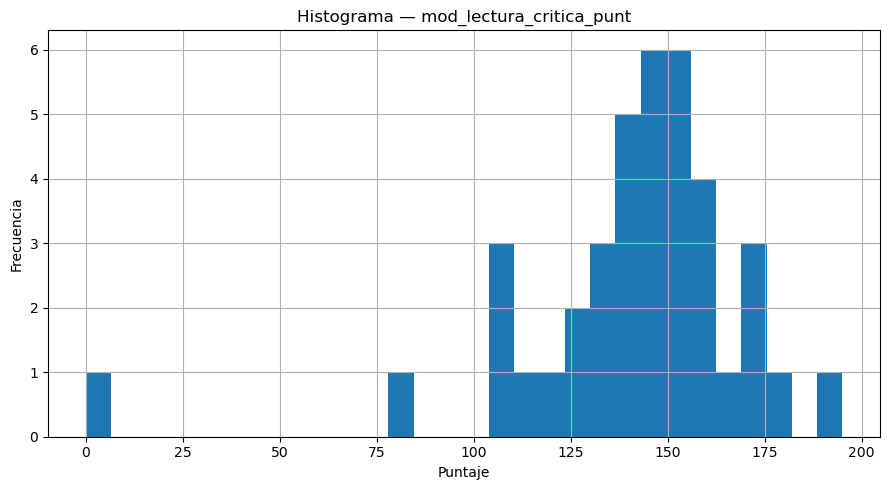

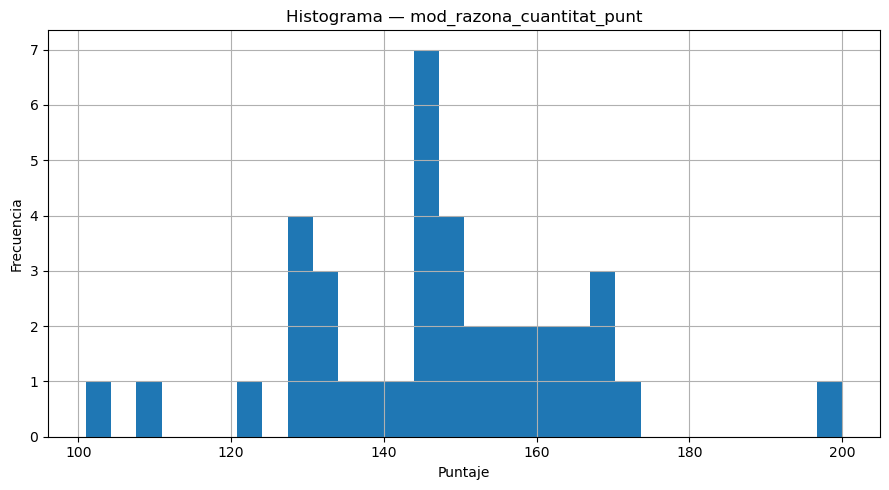

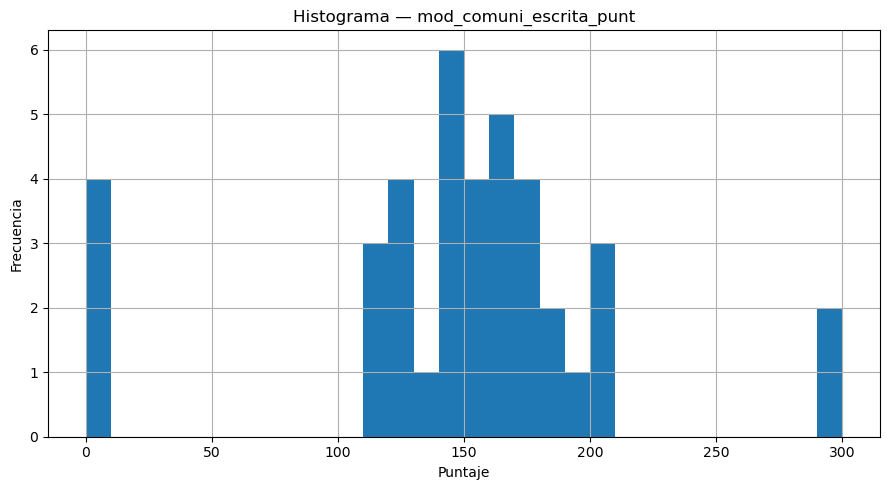

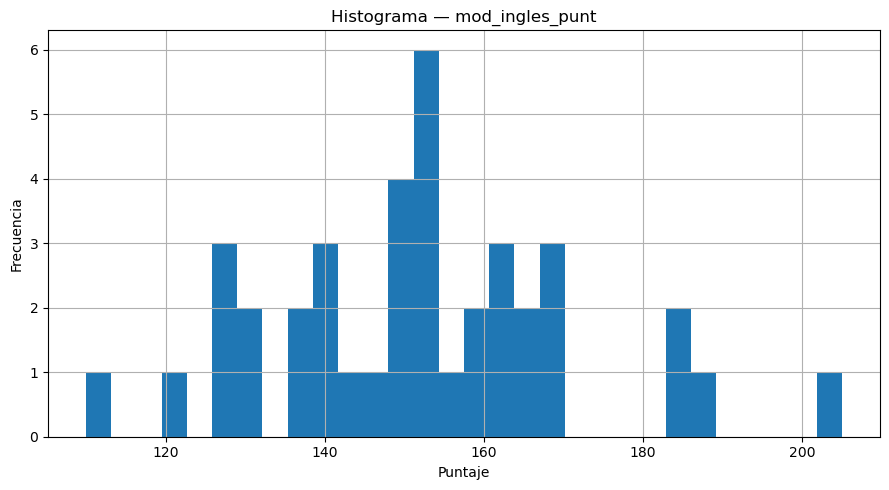

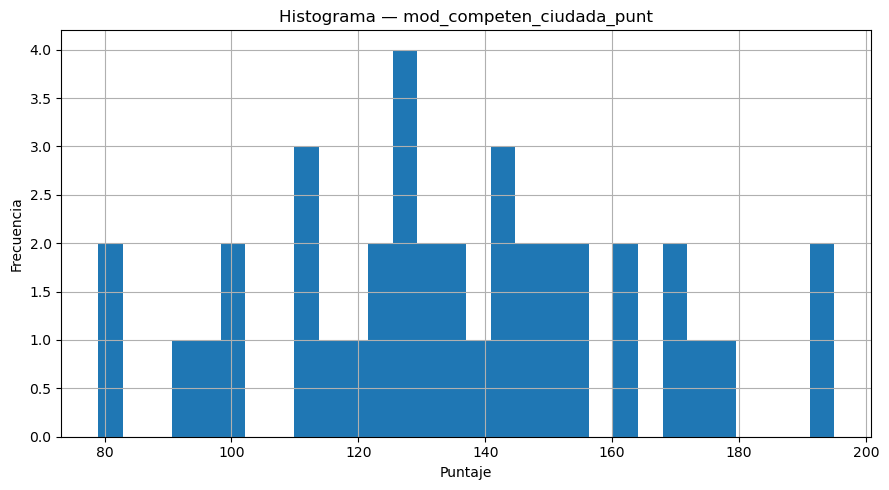

In [8]:

def hist_score(df_, col, title):
    if col in df_.columns and df_[col].notna().any():
        plt.figure()
        df_[col].dropna().plot(kind="hist", bins=30)
        plt.title(title)
        plt.xlabel("Puntaje")
        plt.ylabel("Frecuencia")
        plt.tight_layout()
        plt.show()

hist_score(df_mariana, "punt_global", "Histograma — Puntaje global")
for c in ["mod_lectura_critica_punt","mod_razona_cuantitat_punt","mod_comuni_escrita_punt",
          "mod_ingles_punt","mod_competen_ciudada_punt"]:
    hist_score(df_mariana, c, f"Histograma — {c}")

### Resultados — Histogramas de puntajes (Año 2024)

El **puntaje global** muestra una concentración en torno a los **135-155 puntos**, siendo este el rango más frecuente. La mayoría de los estudiantes se ubica en un desempeño medio, con algunos valores aislados inferiores a 120 y otros superiores a 180. Esto refleja homogeneidad relativa en el nivel promedio, pero con casos extremos que amplían la dispersión.

En el módulo de **lectura crítica**, los puntajes se distribuyen principalmente entre 130 y 160, con picos cercanos a 150. Sin embargo, aparecen valores bajos cercanos a 0 y otros más altos próximos a 200, lo que evidencia desigualdades en el nivel de comprensión lectora de la cohorte.

En cuanto a **razonamiento cuantitativo**, la mayor parte de los estudiantes se concentra en el rango de 130 a 160 puntos, con un pico marcado alrededor de 145. También se identifican algunos desempeños bajos cercanos a 100 y otros más altos que llegan a 200, lo que indica heterogeneidad moderada en esta competencia.

La **comunicación escrita** presenta la mayor variabilidad entre los módulos. Aunque la mayoría de los estudiantes se ubica en un rango de 130 a 180 puntos, existen casos extremos con puntajes de 0 y otros cercanos a 300. Esta amplitud evidencia brechas significativas en las habilidades de redacción y argumentación.

En la prueba de **inglés**, la distribución se concentra entre 140 y 170 puntos, con una mayor frecuencia en torno a 160. Si bien la mayoría se agrupa en un rango medio, también aparecen valores aislados que superan los 200, lo que refleja que un grupo reducido alcanza desempeños altos.

Finalmente, en **competencias ciudadanas**, la mayor parte de los estudiantes se ubica entre 120 y 160 puntos, con frecuencias destacadas en torno a los 140-150. Se observan también puntajes bajos cercanos a 80 y algunos más altos próximos a 190, lo que muestra una distribución relativamente amplia, aunque con concentración clara en niveles medios.

En conjunto, los histogramas de 2024 confirman que la mayoría de los estudiantes se desempeña en rangos medios en todas las áreas, pero persisten **valores extremos en comunicación escrita y lectura crítica**. Esto sugiere que, aunque existe estabilidad en el promedio general, las desigualdades entre estudiantes en ciertas competencias clave siguen siendo marcadas.



## 8) Exportación de datos limpios


In [9]:
from pathlib import Path

# Carpeta de salida
out_dir = Path(r"C:\Temp\spro_2020_tfm_outputs")
out_dir.mkdir(parents=True, exist_ok=True)

# Archivo destino
out_file = out_dir / "spro_mariana_sistemas_2020.csv"

# Guardar df_mariana directamente
df_mariana.to_csv(str(out_file), index=False, encoding="utf-8-sig")
print("✅ Guardado:", out_file)


✅ Guardado: C:\Temp\spro_2020_tfm_outputs\spro_mariana_sistemas_2020.csv


In [11]:
import re, unicodedata
import pandas as pd
from pathlib import Path

# --- helpers de limpieza robusta ---
def fix_mojibake(s):
    """Intenta corregir texto corrupto (utf8/latin1)."""
    if pd.isna(s): 
        return s
    s = str(s)
    # intento 1: típico latin1->utf8
    try:
        return s.encode('latin1').decode('utf-8')
    except Exception:
        pass
    return s

def deaccent_upper(s):
    if pd.isna(s): return s
    s = str(s).upper().strip()
    # quita diacríticos
    s = ''.join(c for c in unicodedata.normalize('NFD', s) 
                if unicodedata.category(c) != 'Mn')
    # colapsa espacios
    s = ' '.join(s.split())
    return s

def clean_depto(s):
    """Normaliza departamento; repara variantes de NARIÑO."""
    if pd.isna(s): return s
    s0 = fix_mojibake(s)
    s1 = deaccent_upper(s0)  # NARIÑO -> NARINO
    # repara casos 'NARIA?O' (carácter raro entre A y O)
    if re.fullmatch(r'NARIA\W?O', s1):
        return 'NARINO'
    # algunos datasets dejan basura no ASCII; homologa
    if s1 in {'NARINO','NARIN0','NARINÓ','NARINÒ','NARIÑO'}:
        return 'NARINO'
    return s1

# --- aplica limpieza a tu dataframe de SPro ---
col_depto = 'estu_inst_departamento'  # ajústalo si tu col cambia
df[col_depto + '_clean'] = df[col_depto].map(clean_depto)

print("Únicos antes:", df[col_depto].dropna().astype(str).str.upper().unique()[:10])
print("Únicos después:", df[col_depto + '_clean'].dropna().unique()[:10])

# --- filtra todos los de Nariño ---
mask_narino = df[col_depto + '_clean'].eq('NARINO')
df_narino = df.loc[mask_narino].copy()
print("Filas Nariño:", len(df_narino))


out_dir = Path(r"C:\Temp\spro_2020_tfm_outputs")
out_dir.mkdir(parents=True, exist_ok=True)

# 1) TODOS Nariño
out_file_nar = out_dir / "spro_narino_2024.csv"
df_narino.to_csv(str(out_file_nar), index=False, encoding="utf-8-sig")
print("✅ Guardado Nariño:", out_file_nar)



Únicos antes: ['ATLANTICO' 'NAN' 'VALLE' 'ANTIOQUIA' 'BOGOTA\x81' 'MAGDALENA'
 'NORTE SANTANDER' 'CORDOBA' 'QUINDIO' 'SANTANDER']
Únicos después: ['ATLANTICO' 'NAN' 'VALLE' 'ANTIOQUIA' 'BOGOTA\x81' 'MAGDALENA'
 'NORTE SANTANDER' 'CORDOBA' 'QUINDIO' 'SANTANDER']
Filas Nariño: 4604
✅ Guardado Nariño: C:\Temp\spro_2020_tfm_outputs\spro_narino_2024.csv



### Conexión con VA/CR
Este dataset representa la **línea de salida** del programa. Al cruzarlo con Saber 11 (línea de entrada), se calcularán el **Valor Agregado** y la **Contribución Relativa**, controlando por variables sociodemográficas y académicas.
